# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [7]:
# number of callbacks for black-sounding names
print('White callbacks : ',sum(data[data.race=='w'].call))
print(' Black callbacks : ',sum(data[data.race=='b'].call))

White callbacks :  235.0
 Black callbacks :  157.0


In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
    <p>Answer 1. Yes the CLT does apply to bernoullis.We would use the two sample test to compare the combined sample mean with a sample of resumes with black names</p>
    <p>Answer 2. Ho: Black or white names do not make any difference in callback.  the difference in mean callback rate between black and white sounding resume populations is similar to the difference in mean callback rate of any two random samples from overall population  with > 5% significance  <br></p>
    <p>   Ha: there is a racial bias in resume callback rate. The difference between mean of white and black resume callback is > mean diff of random samples taken from overall population</p>
                    
</div>

In [76]:
w = data[data.race=='w']
b = data[data.race=='b']
p_w = sum(data[data.race=='w'].call) / len(w)
p_b = sum(data[data.race=='b'].call) / len(b)
p = sum(data.call) / len(data)

print('Whites : ',len(w), 'White Sample mean : ',p_w, ' Overall sample var : ',p_w*(1-p_w))
print('Blacks : ',len(b), 'Black Sample mean : ',p_b, ' Black sample var : ',p_b*(1-p_b))
print('Blacks : ',len(b), 'Black Sample mean : ',p,' Overall sample var : ',p*(1-p))


Whites :  2435 White Sample mean :  0.09650924024640657  Overall sample var :  0.08719520679346794
Blacks :  2435 Black Sample mean :  0.06447638603696099  Black sample var :  0.060319181680573764
Blacks :  2435 Black Sample mean :  0.08049281314168377  Overall sample var :  0.07401372017422175


In [59]:
#Answer 3
# This is a Bernouli distribution with above sample means and variance - Assuming that 
# Bootstrap method
# Establish difference of provided sample mean
print('Whites : ',len(w), 'White Sample mean : ',sum(data[data.race=='w'].call) / len(w))
print('Blacks : ',len(b), 'Black Sample mean : ',sum(data[data.race=='b'].call) / len(b))
b_w_mean_diff = sum(data[data.race=='w'].call) / len(w) - sum(data[data.race=='b'].call) / len(b)
print('Difference :', b_w_mean_diff )

#Selecting random index values to form random selection samples
def random_index_sel(a,prop):
  #  print('total len :',len(a))
    l = int(prop*len(a))
    
    ar = np.random.choice(a,len(a))
    s = ar[:l]
    t = ar[l:]
  #  print('s :',s)
  #  print('t :',t)
    return s,t

size = 10000
bs_diff_reps = np.empty(size)
x_mean = np.empty(size)
y_mean = np.empty(size)

for i in range(10000):
    x,y = random_index_sel(data.index.values,0.5)
    x_mean[i] = sum(data.loc[x].call) / len(data.loc[x])
    y_mean[i] = sum(data.loc[y].call) / len(data.loc[y])
    
    bs_diff_reps = x_mean - y_mean




Whites :  2435 White Sample mean :  0.09650924024640657
Blacks :  2435 Black Sample mean :  0.06447638603696099
Difference : 0.032032854209445585


In [83]:
import scipy.stats as st

# Bootstrap Approach
print('Answer 3: BOOTSTRAP')
print(' Probability of observing a mean difference as extreme as the difference between means of black / white sample (p value):',
    np.sum(bs_diff_reps >= b_w_mean_diff ) / len(bs_diff_reps))
print('mean :',np.mean(bs_diff_reps))
sum_of_error = (bs_diff_reps - np.mean(bs_diff_reps))
print('standard error of sample mean differences (BS ):',np.sqrt(np.sum([x**2 for x in sum_of_error])/(len(bs_diff_reps) - 1)))

print('95% confidence interval of sample mean differences (BS):',np.percentile(bs_diff_reps,[2.5,97.5]))

#Frequentist Approach
sem  = np.sqrt(p*(1-p)/len(data))
print('FREQUENTIST')
print('Sample mean of combined population :',p)
print('Std error of sample mean distribution (Frequentist): ',sem)
print('95% confidence interval : [',p-sem*st.norm.ppf(.025),',',p+sem*st.norm.ppf(.975),']')


Answer 3: BOOTSTRAP
 Probability of observing a mean difference as extreme as the difference between means of black / white sample (p value): 0.0
mean : -0.00019540041067761784
standard error of sample mean differences (BS ): 0.007711443936046385
95% confidence interval of sample mean differences (BS): [-0.01520534  0.01478439]
FREQUENTIST
Sample mean of combined population : 0.08049281314168377
Std error of sample mean distribution (Frequentist):  0.0038984470180852284
95% confidence interval : [ 0.08813362889276839 , 0.08813362889276839 ]


<div class="span5 alert alert-success">
<p> 4. Given a p-value of 0 for a mean difference as extreme as the difference in callback rate of the black and white sounding name samples, indicates that there is some race bias built into the callback rate</p>
<p>Based on frequentist approach too the black and white sample means are not within 95% confidence interval of the 
sample mean distribution </p>
</div>
<div class="span5 alert alert-success">
<p> 5. This test only indicates whether race has an impact on call rate or not and the certainity with which we can say that. The degree of impact driven by race can be determined using a regression expression and comparing standardized coefficients of the regression expression</p>
</div>

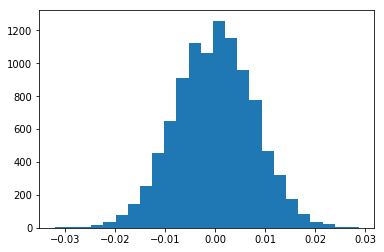

In [57]:
import matplotlib.pyplot as plt


# Get a distribution of combined population samples
plt.hist(bs_diff_reps, bins=25)
plt.show()


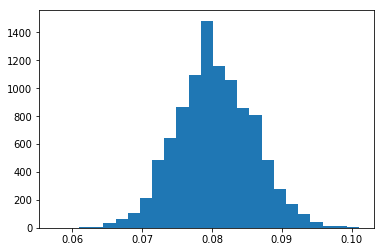

In [48]:
# Get a distribution of white population samples
plt.hist(x_mean, bins=25)
plt.show()

In [ ]:
# Get a distribution of black population samples
plt.hist(y_mean, bins=25)
plt.show()